In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
df = pd.DataFrame(iris.data)
df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
df.columns = iris.feature_names

In [5]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [19]:
#predict probabilities based on dimensions of flowers, whether they belong to which type of flower.
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

y = df.target
X = df.drop(columns=['target'])
clf = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
clf.fit(X_train, y_train)

GaussianNB()

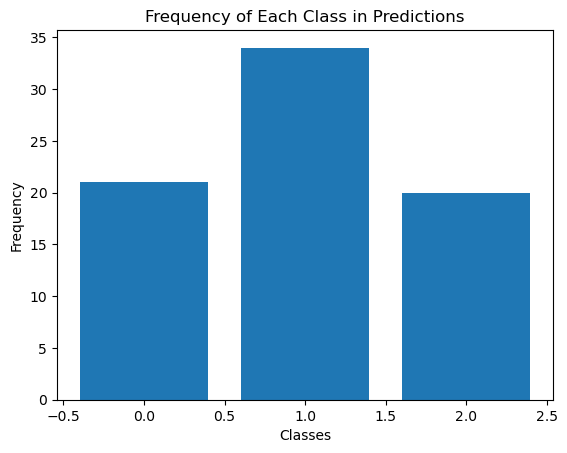

In [28]:
import matplotlib.pyplot as plt
import numpy as np
result=clf.predict(X_test)
X_values, Y_values = np.unique(result, return_counts=True)

plt.bar(X_values, Y_values)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Frequency of Each Class in Predictions')
plt.show()


In [23]:
clf.score(X_test, y_test)

0.9466666666666667

In [25]:
cross_val_score(clf, X_test, y_test)

array([1.        , 1.        , 0.86666667, 0.86666667, 0.93333333])

In [7]:
condition = (df['sepal length (cm)'] < 5.0) & (df['target'] == 0)
result = df[condition]
result

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
6,4.6,3.4,1.4,0.3,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0
11,4.8,3.4,1.6,0.2,0
12,4.8,3.0,1.4,0.1,0
13,4.3,3.0,1.1,0.1,0
22,4.6,3.6,1.0,0.2,0
